In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.datasets import make_blobs
from sklearn.cluster import BisectingKMeans, KMeans
%matplotlib inline
import os

## Read files

In [2]:
path =  os.path.join('Proyecto','images')
imagefiles=os.listdir(path)

## Display RGB image 

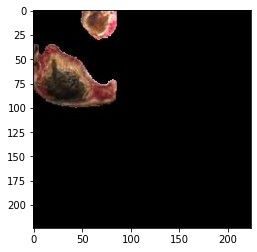

In [3]:
imgname = os.path.join(path,'I76_cregion.jpeg')
img1 = cv2.imread(imgname)
img2=np.zeros(img1.shape,np.uint8)
img2[:,:,0]=img1[:,:,2]
img2[:,:,1]=img1[:,:,1]
img2[:,:,2]=img1[:,:,0]
plt.imshow(img2)

## Flatten image

In [4]:
img_flat = img2.reshape([img2.shape[0]*img2.shape[1],3])
img_flat=img_flat.astype(np.float64)

## K-means clusters

In [5]:
n_clusters_list = [3]
clustering_algorithms = {
    "Bisecting K-Means": BisectingKMeans,
    "K-Means": KMeans,
}
random_state = 0

In [6]:
X = img_flat

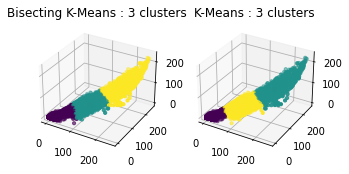

In [7]:
fig = plt.figure(figsize=plt.figaspect(0.5))

labels_rgb = []

for i, (algorithm_name, Algorithm) in enumerate(clustering_algorithms.items()):
    for j, n_clusters in enumerate(n_clusters_list):
        algo = Algorithm(n_clusters=n_clusters, random_state=random_state, n_init=3)
        algo.fit(X)
        centers = algo.cluster_centers_
        labels_rgb.append(algo.labels_)
        
        ax = fig.add_subplot(1, 3, i+1, projection='3d')
        ax.scatter(X[:, 0], X[:, 1], X[:, 2], s=10, c=algo.labels_)
        ax.scatter(centers[:, 0], centers[:, 1],centers[:, 2], c="r", s=20)

        ax.set_title(f"{algorithm_name} : {n_clusters} clusters")

plt.show()

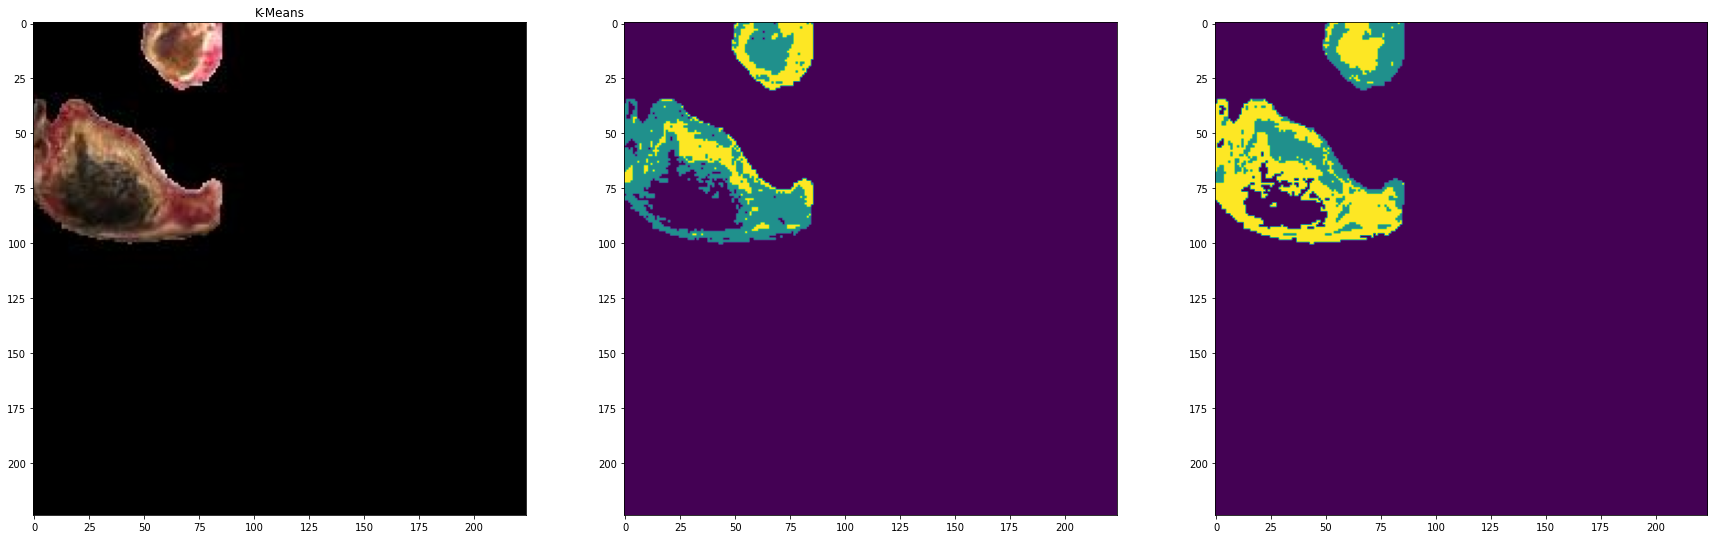

In [8]:
fig,axs = plt.subplots(1,3,figsize=(30,10))
axs[0].imshow(img2)
axs[0].title.set_text('Original RGB Image')
axs[1].imshow(labels_rgb[0].reshape([img2.shape[0],img2.shape[1]]))
axs[0].title.set_text('Bisecting K-Means')
axs[2].imshow(labels_rgb[1].reshape([img2.shape[0],img2.shape[1]]))
axs[0].title.set_text('K-Means')
plt.show()

## RGB to YCbCr

In [9]:
img=cv2.cvtColor(img1,cv2.COLOR_BGR2YCR_CB)

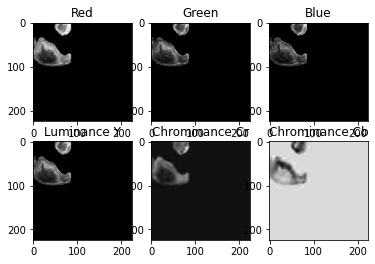

In [10]:
plt.figure()
plt.subplot(2,3,1)
plt.imshow(img1[:,:,2],cmap="gray")
plt.title('Red')
plt.subplot(2,3,2)
plt.imshow(img1[:,:,1],cmap="gray")
plt.title('Green')
plt.subplot(2,3,3)
plt.imshow(img1[:,:,0],cmap="gray")
plt.title('Blue')

plt.subplot(2,3,4)
plt.imshow(img[:,:,0],cmap="gray")
plt.title('Luminance Y')
plt.subplot(2,3,5)
plt.imshow(img[:,:,1],cmap="gray")
plt.title('Chrominance Cr')
plt.subplot(2,3,6)
plt.imshow(img[:,:,2],cmap="gray")
plt.title('Chrominance Cb')
plt.show()

In [11]:
img_flat = img.reshape([img.shape[0]*img.shape[1],3])
img_flat=img_flat.astype(np.float64)

In [12]:
n_clusters_list = [3]
clustering_algorithms = {
    "Bisecting K-Means": BisectingKMeans,
    "K-Means": KMeans,
}
random_state = 0

In [13]:
X = img_flat

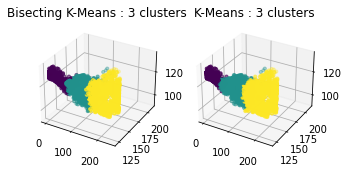

In [14]:
fig = plt.figure(figsize=plt.figaspect(0.5))

labels_ycbcr = []

for i, (algorithm_name, Algorithm) in enumerate(clustering_algorithms.items()):
    for j, n_clusters in enumerate(n_clusters_list):
        algo = Algorithm(n_clusters=n_clusters, random_state=random_state, n_init=3)
        algo.fit(X)
        centers = algo.cluster_centers_
        labels_ycbcr.append(algo.labels_)
        ax = fig.add_subplot(1, 3, i+1, projection='3d')
        ax.scatter(X[:, 0], X[:, 1], X[:, 2], s=10, c=algo.labels_)
        ax.scatter(centers[:, 0], centers[:, 1],centers[:, 2], c="r", s=20)

        ax.set_title(f"{algorithm_name} : {n_clusters} clusters")

plt.show()

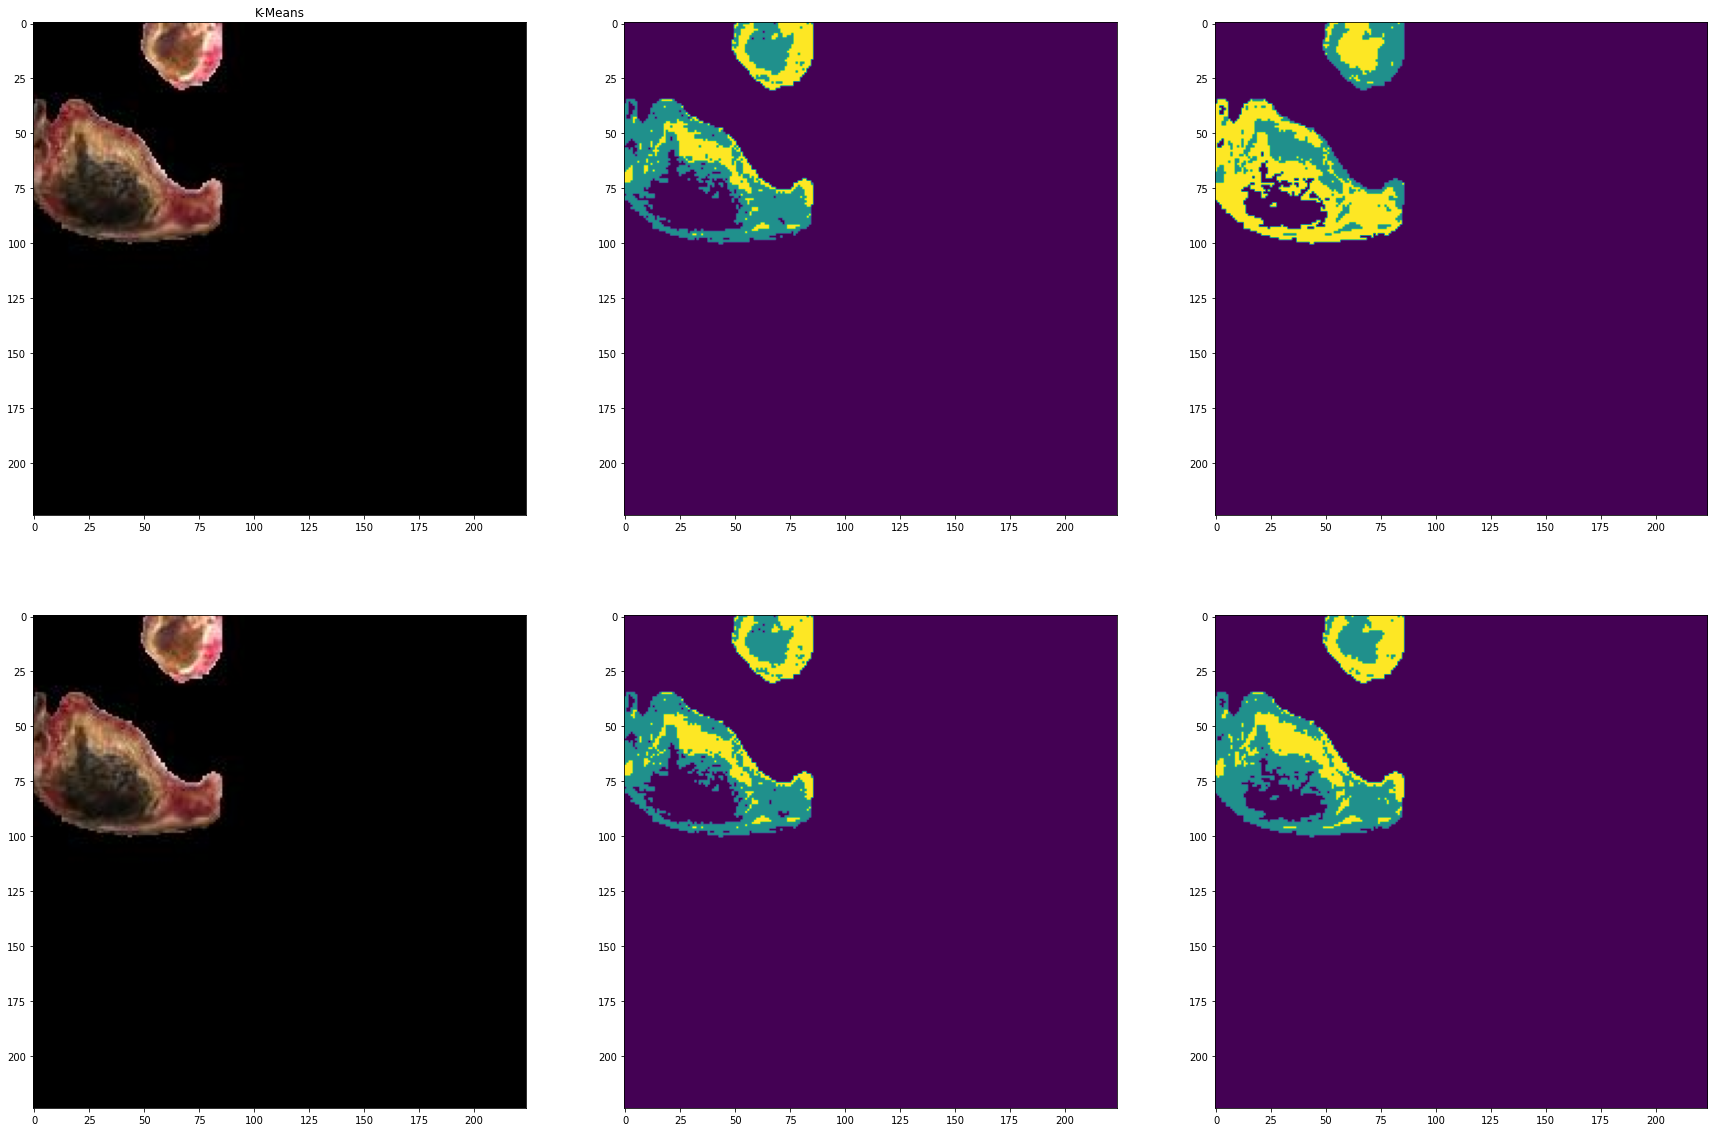

In [15]:
fig,axs = plt.subplots(2,3,figsize=(30,20))

axs[0,0].imshow(img2)
axs[0,0].title.set_text('Original RGB Image')
axs[0,1].imshow(labels_rgb[0].reshape([img.shape[0],img.shape[1]]))
axs[0,0].title.set_text('Bisecting K-Means')
axs[0,2].imshow(labels_rgb[1].reshape([img.shape[0],img.shape[1]]))
axs[0,0].title.set_text('K-Means')

axs[1,0].imshow(img2)
axs[1,1].imshow(labels_ycbcr[0].reshape([img.shape[0],img.shape[1]]))
axs[1,2].imshow(labels_ycbcr[1].reshape([img.shape[0],img.shape[1]]))
plt.show()

## Model with Bisecting K-Means and RGB image

## Training

In [16]:
path_train =  os.path.join('Proyecto','train','patches')
imagefiles=os.listdir(path_train)

In [17]:
def read_rgbimg(file):
    img = cv2.imread(file)
    img2=np.zeros(img.shape,np.uint8)
    img2[:,:,0]=img[:,:,2]
    img2[:,:,1]=img[:,:,1]
    img2[:,:,2]=img[:,:,0]
    return img2

In [18]:
def flatten_img(file):
    img = read_rgbimg(file)
    img_flat = img.reshape([img.shape[0]*img.shape[1],3])
    img_flat = img_flat.astype(np.float64)
    return img,img_flat

### training set X

In [19]:
file_name = os.path.join(path_train, imagefiles[0])
img,X = flatten_img(file_name)
for i in range(1,len(imagefiles)):
    file_name = os.path.join(path_train, imagefiles[i])
    img,img_flat = flatten_img(file_name)
    X = np.concatenate([X,img_flat])
X.shape

(180438, 3)

In [20]:
bkm = BisectingKMeans(n_clusters=3, random_state=5, n_init=3)
bkm.fit(X)
# bkm.labels_.reshape([img.shape[0],img.shape[1]])

BisectingKMeans(n_clusters=3, n_init=3, random_state=5)

## Test

In [21]:
path_test =  os.path.join('Proyecto','images')
imagefiles = os.listdir(path_test)

In [22]:
def test_model(file,model):
    img,X_test = flatten_img(file_name)
    y_test = model.predict(X_test)
    img_labeled=y_test.reshape([img.shape[0],img.shape[1]])
    return img,img_labeled

In [23]:
# for i in range(15):
file_name = os.path.join(path, imagefiles[0])
img,img_labeled=test_model(file_name,bkm)

# fig,axs = plt.subplots(1,2,figsize=(20,10))
# axs[0].imshow(img)
# axs[1].imshow(img_labeled)
# plt.show()

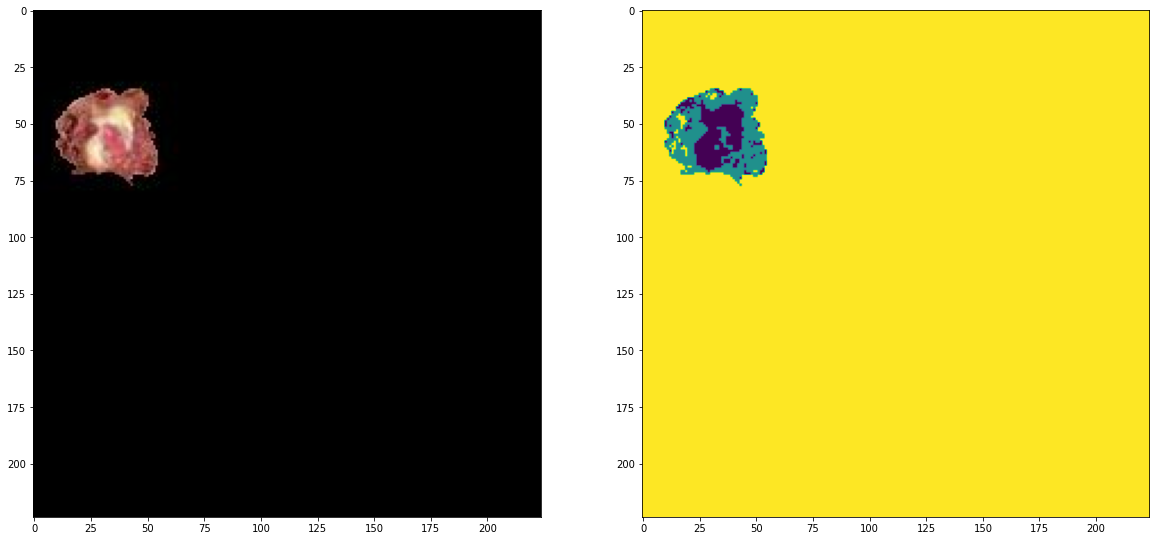

In [24]:
fig,axs = plt.subplots(1,2,figsize=(20,10))
axs[0].imshow(img)
axs[1].imshow(img_labeled)
plt.show()

In [ ]:
file_name = os.path.join(path, imagefiles[1])
img,img_labeled=test_model(file_name,bkm)

In [ ]:
fig,axs = plt.subplots(1,2,figsize=(20,10))
axs[0].imshow(img)
axs[1].imshow(img_labeled)
plt.show()

In [ ]:
file_name = os.path.join(path, imagefiles[2])
img,img_labeled=test_model(file_name,bkm)

fig,axs = plt.subplots(1,2,figsize=(20,10))
axs[0].imshow(img)
axs[1].imshow(img_labeled)
plt.show()